<a href="https://colab.research.google.com/github/UnitForDataScience/ML-DL-Open-Lab-Series/blob/main/Unsupervised_Learning_Assocation_with_Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Association Rule Mining with Apriori Algorithm

In [207]:
import pandas as pd

import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

import networkx as nx

## 📥 Step 1: Load and Prepare Dataset

In [215]:
df = pd.read_csv("https://raw.githubusercontent.com/UnitForDataScience/ML-DL-Open-Lab-Series/refs/heads/main/Open%20Lab%204/groceries.csv")
df

,Transaction
0,Eggs; Potatoes; Sugar; Yogurt; Onions; Rice; O...
1,Tomatoes; Milk; Yogurt; Rice; Cereal; Bread
2,Tomatoes; Diapers; Beer; Rice; Cheese; Coffee
3,Milk; Pasta; Rice; Onions; Apples; Cereal; Bread
4,Milk; Bananas; Chicken; Yogurt; Rice; Onions; ...
...,...
9995,Milk; Beer; Pasta; Chicken; Onions; Flour; Cereal
9996,Eggs; Beer; Sugar; Chicken; Apples; Flour; Cer...
9997,Diapers; Eggs; Potatoes; Milk; Beer; Chicken; ...
9998,Eggs; Beer; Onions; Rice; Cheese; Orange Juice...


In [216]:
### Convert transactions from string to lists
transactions = df["Transaction"].dropna().apply(lambda x: x.split("; ")).tolist()

### Convert dataset to a One-Hot Encoded DataFrame
te = TransactionEncoder()
encoded_data = te.fit(transactions).transform(transactions)
df_clean= pd.DataFrame(encoded_data, columns=te.columns_)
df_clean

,Apples,Bananas,Beer,Bread,Butter,Cereal,Cheese,Chicken,Coffee,Diapers,...,Milk,Onions,Orange Juice,Pasta,Potatoes,Rice,Sugar,Tea,Tomatoes,Yogurt
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,True,False,False,True
1,False,False,False,True,False,True,False,False,False,False,...,True,False,False,False,False,True,False,False,True,True
2,False,False,True,False,False,False,True,False,True,True,...,False,False,False,False,False,True,False,False,True,False
3,True,False,False,True,False,True,False,False,False,False,...,True,True,False,True,False,True,False,False,False,False
4,True,True,False,False,False,True,False,True,False,False,...,True,True,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,False,False,True,False,False,True,False,True,False,False,...,True,True,False,True,False,False,False,False,False,False
9993,True,False,True,True,True,True,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
9994,False,False,True,True,True,True,True,True,False,True,...,True,False,False,False,True,True,False,True,False,False
9995,False,False,True,False,False,True,True,False,False,False,...,False,True,True,False,False,True,False,True,False,False


## 📊 Step 2: Applying Apriori Algorithm to Find Frequent Itemsets

In [221]:
### apply apriori algorithm

min_support = 0.07 ### Minimum support threshold
frequent_itemsets = apriori(df_clean, min_support=min_support, use_colnames=True)

### display frequent itemsets
frequent_itemsets.sort_values(by="support", ascending=False).head(10)

,support,itemsets
5,0.492548,(Cereal)
10,0.490247,(Eggs)
3,0.488046,(Bread)
2,0.482145,(Beer)
15,0.310593,(Pasta)
7,0.303791,(Chicken)
17,0.303591,(Rice)
6,0.302291,(Cheese)
4,0.301190,(Butter)
18,0.300990,(Sugar)


## 🔗 Step 3: Generating Association Rules

In [224]:
### generate association rules
min_confidence = 0.3  ### minimum confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

### display top rules
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by="lift", ascending=False).head(50)

,antecedents,consequents,support,confidence,lift
745,"(Bread, Diapers)","(Butter, Beer)",0.079024,0.559490,3.802327
746,"(Butter, Beer)","(Bread, Diapers)",0.079024,0.537050,3.802327
744,"(Bread, Beer)","(Butter, Diapers)",0.079024,0.341843,3.751271
747,"(Butter, Diapers)","(Bread, Beer)",0.079024,0.867179,3.751271
759,"(Milk, Beer)","(Cereal, Diapers)",0.078624,0.536519,3.704129
762,"(Cereal, Diapers)","(Milk, Beer)",0.078624,0.542818,3.704129
786,"(Butter, Potatoes)","(Eggs, Bread)",0.076423,0.892523,3.696171
783,"(Eggs, Bread)","(Butter, Potatoes)",0.076423,0.316487,3.696171
793,"(Milk, Potatoes)","(Eggs, Cereal)",0.077623,0.892980,3.695002
792,"(Eggs, Cereal)","(Milk, Potatoes)",0.077623,0.321192,3.695002


## 💾 Step 4: Saving Results

In [225]:
### Save results to CSV files
frequent_itemsets.to_csv("frequent_itemsets.csv", index=False)
rules.to_csv("association_rules.csv", index=False)
print("Files saved successfully!")

Files saved successfully!


## 📊 Step 5: Visualizing Frequent Itemsets

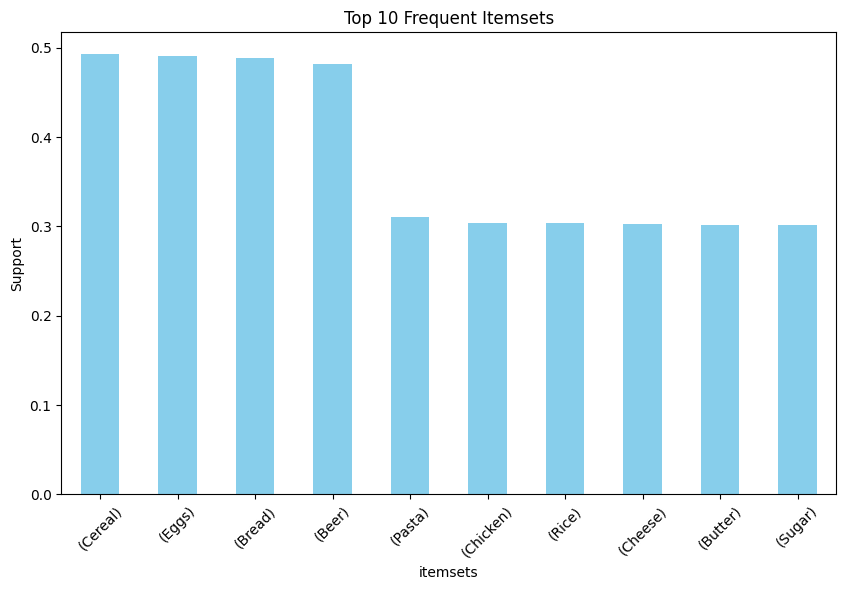

In [226]:
### bar chart of top frequent itemsets
plt.figure(figsize=(10, 6))
frequent_itemsets.nlargest(10, 'support').set_index('itemsets')['support'].plot(kind='bar', color='skyblue')
plt.title('Top 10 Frequent Itemsets')
plt.ylabel('Support')
plt.xticks(rotation=45)
plt.show()

## 🔗 Step 6: Visualizing Association Rules as a Network Graph

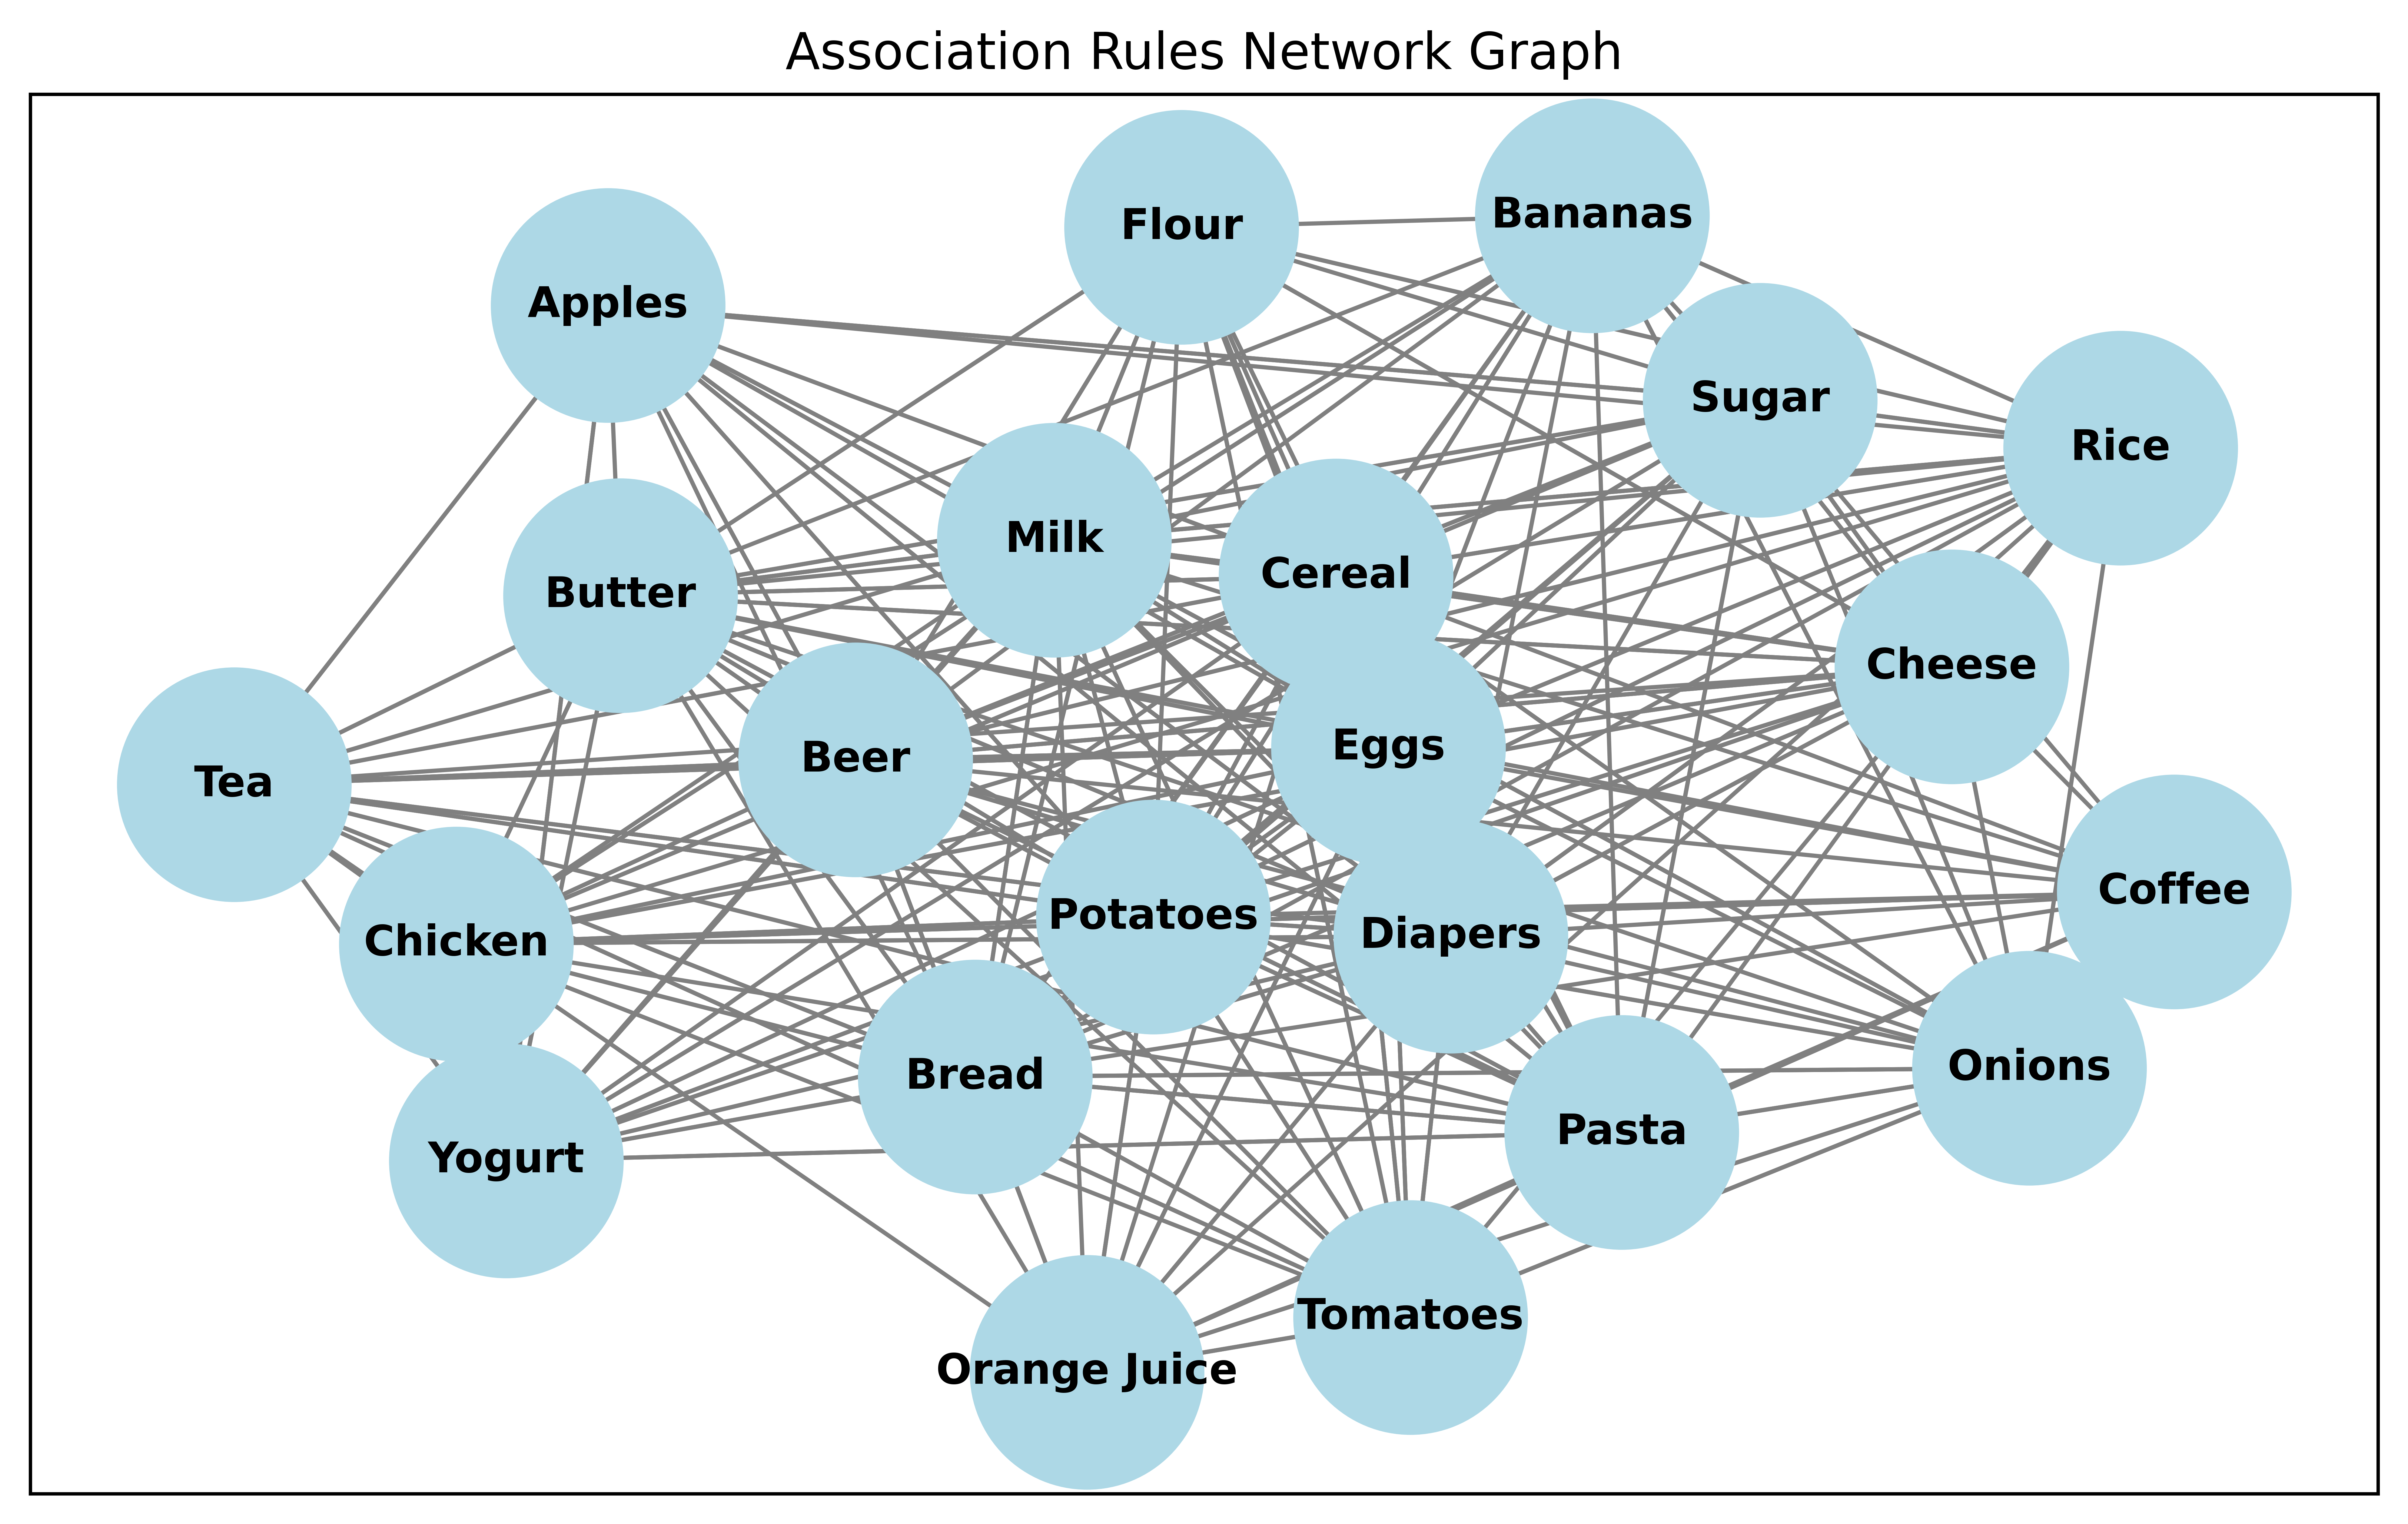

In [228]:
### network graph for association rules
plt.figure(figsize=(10, 6), dpi=1000)
G = nx.DiGraph()

### add edges to graph
for _, rule in rules.iterrows():
    for ant in rule['antecedents']:
        for cons in rule['consequents']:
            G.add_edge(ant, cons, weight=rule['lift'])

### Draw network graph
pos = nx.spring_layout(G, k=0.5)
edges = nx.draw_networkx_edges(G, pos, edge_color="gray")
nodes = nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="lightblue")
labels = nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

plt.title("Association Rules Network Graph")
plt.show()